### **Assignment 2**

In [28]:
cipher_text= """Kg fcwd qh vin pnzy hjcocnt, cjjwg ku wnth nnyvng kxa cjjwg. Urfjm xwy yjg rbbufqwi "vjg_djxn_ofs_dg_rmncbgi" yq iq uqtxwlm. Oca zxw qcaj vjg tctnplyj hqs cjn pjcv ejbvdnt. Yt hkpe cjn gcnv, aqv okauy bknn ongm vt zvvgs vcpkh bqtft cjntj."""

#### **Preprocessing**
The cipher text looked alphabet-wise encrypted. While encrypting such ciphers, spaces, commas, quotes, underscores and full-stops aren't encrypted. We remove them from the cipher text.

In [29]:
cipher_text=cipher_text.lower()
cipher_text=cipher_text.replace(",","")
cipher_text=cipher_text.replace(".","")
cipher_text=cipher_text.replace("\"","")
cipher_text=cipher_text.replace("_","")

cipher_text

'kg fcwd qh vin pnzy hjcocnt cjjwg ku wnth nnyvng kxa cjjwg urfjm xwy yjg rbbufqwi vjgdjxnofsdgrmncbgi yq iq uqtxwlm oca zxw qcaj vjg tctnplyj hqs cjn pjcv ejbvdnt yt hkpe cjn gcnv aqv okauy bknn ongm vt zvvgs vcpkh bqtft cjntj'

In [30]:
cipher_text_concat=cipher_text.replace(" ","")

cipher_text_concat

'kgfcwdqhvinpnzyhjcocntcjjwgkuwnthnnyvngkxacjjwgurfjmxwyyjgrbbufqwivjgdjxnofsdgrmncbgiyqiquqtxwlmocazxwqcajvjgtctnplyjhqscjnpjcvejbvdntythkpecjngcnvaqvokauybknnongmvtzvvgsvcpkhbqtftcjntj'

#### **Frequency Analysis of the given cipher text**

In [31]:
import matplotlib.pyplot as plt

# Function to plot a bar graph x->names, y->values. 
# (Ensure that names and values are lists, and names[i] is mapped to values[i])

def plot_bar_graph(names,values):
  plt.bar(range(len(names)), values, tick_label=names)
  plt.show()

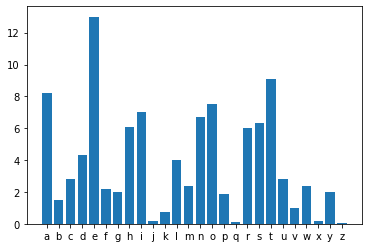

In [32]:
# The Relative frequency distribution in the English language

ideal_freq_dist={'a':8.2, 'b':1.5, 'c':2.8, 'd':4.3, 'e':13, 'f':2.2, 'g':2, 'h':6.1, 'i':7, 'j':0.15, 'k':0.77, 'l':4, 'm':2.4, 'n':6.7, 'o':7.5, 'p':1.9, 'q':0.095, 'r':6, 's':6.3, 't':9.1, 'u':2.8, 'v':0.98, 'w':2.4, 'x':0.15, 'y':2, 'z':0.074}

plot_bar_graph(list(ideal_freq_dist.keys()),list(ideal_freq_dist.values()))

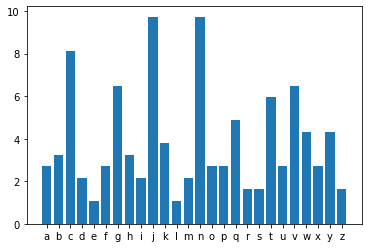

In [33]:
distribution={'a':0, 'b':0, 'c':0, 'd':0, 'e':0, 'f':0, 'g':0, 'h':0, 'i':0, 'j':0, 'k':0, 'l':0, 'm':0, 'n':0, 'o':0, 'p':0, 'q':0, 'r':0, 's':0, 't':0, 'u':0, 'v':0, 'w':0, 'x':0, 'y':0, 'z':0}

for j in range (0, len(cipher_text_concat)):
  distribution[cipher_text_concat[j]]=distribution[cipher_text_concat[j]]+1
# print(distribution)
for alph in distribution:
  distribution[alph]=distribution[alph]*(100/len(cipher_text_concat))

# print(distribution)
plot_bar_graph(list(distribution.keys()),list(distribution.values()))

There is a lot of flatness in the cipher text distribution. This indicates that the encryption is unlikely to be monoalphabetic. 

Also, after counting number of lines in horizontal dimension on the first screen, we got `9292552221`. This looks some sort of key (to be wrapped-around).

Hence, we try using one of the most common polyaplhabetic substitution of such type: **Vigenere Encryption**.

#### **Decrypting using Vigenere Cipher**

In [34]:
cipher_text= """Kg fcwd qh vin pnzy hjcocnt, cjjwg ku wnth nnyvng kxa cjjwg. Urfjm xwy yjg rbbufqwi "vjg_djxn_ofs_dg_rmncbgi" yq iq uqtxwlm. Oca zxw qcaj vjg tctnplyj hqs cjn pjcv ejbvdnt. Yt hkpe cjn gcnv, aqv okauy bknn ongm vt zvvgs vcpkh bqtft cjntj."""
cipher_text=cipher_text.lower()

In [35]:
# Function to decrypt using Vigenere Encryption

def decrypt(cipher_text, key):
    plain_text = ""
    for i in range(len(cipher_text)):
        x = ((ord(cipher_text[i])-ord('a')) -
             (ord(key[i%(len(key))])-ord('0'))) % 26
        x += ord('a')
        plain_text += chr(x)
    return plain_text

In [36]:
plain_text=decrypt(cipher_text_concat,"9292552221")

In [37]:
decryption_cleaned=""
others=0
for i in range (0, len(cipher_text)):
  if (cipher_text[i] > 'z' or cipher_text[i] < 'a'):
    decryption_cleaned+=cipher_text[i]
    others=others+1
  else:
    decryption_cleaned+=plain_text[i-others]

decryption_cleaned

'be wary of the next chamber, there is very little joy there. speak out the password "the_cave_man_be_pleased" to go through. may you have the strength for the next chamber. to find the exit, you first will need to utter magic words there.'